In [1]:
import numpy as np
import pandas as pd

In [2]:
# Code for beautyfying the plots
#@markdown This sets the styles of the plotting (default is styled like plots from [FiveThirtyeight.com](https://fivethirtyeight.com/)
matplotlib_style = 'fivethirtyeight' #@param ['fivethirtyeight', 'bmh', 'ggplot', 'seaborn', 'default', 'Solarize_Light2', 'classic', 'dark_background', 'seaborn-colorblind', 'seaborn-notebook']
import matplotlib.pyplot as plt; plt.style.use(matplotlib_style)
import matplotlib.axes as axes
from matplotlib.patches import Ellipse
#%matplotlib inline
import seaborn as sns; sns.set_context('notebook')

class _TFColor(object):
    """Enum of colors used in TF docs."""
    red = '#F15854'
    blue = '#5DA5DA'
    orange = '#FAA43A'
    green = '#60BD68'
    pink = '#F17CB0'
    brown = '#B2912F'
    purple = '#B276B2'
    yellow = '#DECF3F'
    gray = '#4D4D4D'
    def __getitem__(self, i):
        return [
            self.red,
            self.orange,
            self.green,
            self.blue,
            self.pink,
            self.brown,
            self.purple,
            self.yellow,
            self.gray,
        ][i % 9]
TFColor = _TFColor()

In [3]:
raw_survey = pd.read_csv("data/kaggle_survey_2021_responses.csv")

c:\python\python38_data\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,195,201,285,286,287,288,289,290,291,292) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
raw_survey.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


In [6]:
raw_survey.shape

(25974, 369)

In [9]:
raw_survey.describe(include="all")

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
count,25974,25974,25974,25974,25974,25974,25974,21861,5335,10757,...,634,592,4240,730,738,1021,667,2748,4543,378
unique,5410,12,6,67,8,16,8,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,484,25-29,Man,India,Master’s degree,Student,1-3 years,Python,R,SQL,...,Comet.ml,Sacred + Omniboard,TensorBoard,Guild.ai,Polyaxon,ClearML,Domino Model Monitor,MLflow,None,Other
freq,42,4931,20598,7434,10132,6804,7874,21860,5334,10756,...,633,591,4239,729,737,1020,666,2747,4542,377


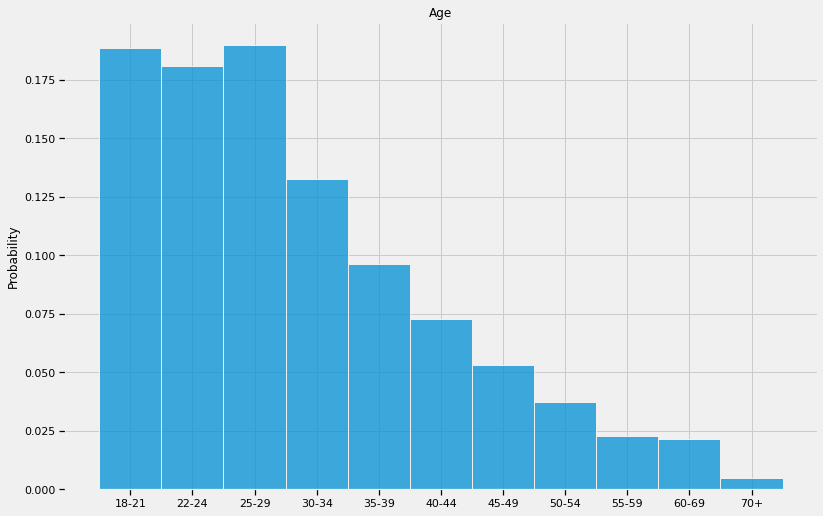

In [28]:
plt.figure(figsize=(12, 8))
sns.histplot(sorted(raw_survey['Q1'][1:]), stat='probability')
plt.title("Age")
plt.show()

In [35]:
gender = list(np.unique(sorted(raw_survey['Q2'][1:]), return_counts=True))
gender[1] = gender[1]/sum(gender[1])
gender

[array(['Man', 'Nonbinary', 'Prefer not to say', 'Prefer to self-describe',
        'Woman'], dtype='<U23'),
 array([0.79305433, 0.00338813, 0.01366804, 0.00161706, 0.18827244])]

In [47]:
country = list(np.unique(raw_survey['Q3'][1:], return_counts=True))
country[1] = country[1]/sum(country[1])
country = dict(zip(country[0], country[1]))
country = sorted(country.items(), key= lambda x: x[1], reverse=True)
country = dict(country)
country

{'India': 0.28622030570207524,
 'United States of America': 0.10202903014669079,
 'Other': 0.04889693142879144,
 'Japan': 0.03545990066607631,
 'China': 0.03134023793939861,
 'Brazil': 0.02891464212836407,
 'Russia': 0.028568128441073423,
 'Nigeria': 0.027028067608670544,
 'United Kingdom of Great Britain and Northern Ireland': 0.021175836445539598,
 'Pakistan': 0.02040580602933816,
 'Egypt': 0.018557733030454705,
 'Germany': 0.018095714780733838,
 'Spain': 0.017479690447772686,
 'Indonesia': 0.017094675239671966,
 'Turkey': 0.01601663265698995,
 'France': 0.015439109844838872,
 'South Korea': 0.013822045970815848,
 'Taiwan': 0.012859507950564047,
 'Canada': 0.012744003388133831,
 'Bangladesh': 0.012204982096792823,
 'Italy': 0.011973972971932392,
 'Mexico': 0.010741924306010087,
 'Viet Nam': 0.010664921264389943,
 'Australia': 0.010164401493859007,
 'Kenya': 0.009548377160897856,
 'Colombia': 0.008662842182266199,
 'Poland': 0.008431833057405767,
 'Iran, Islamic Republic of...': 0.007

In [48]:
raw_survey['Q4'].unique()

array(['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?',
       'Bachelor’s degree', 'Master’s degree', 'Doctoral degree',
       'I prefer not to answer',
       'Some college/university study without earning a bachelor’s degree',
       'No formal education past high school', 'Professional doctorate'],
      dtype=object)

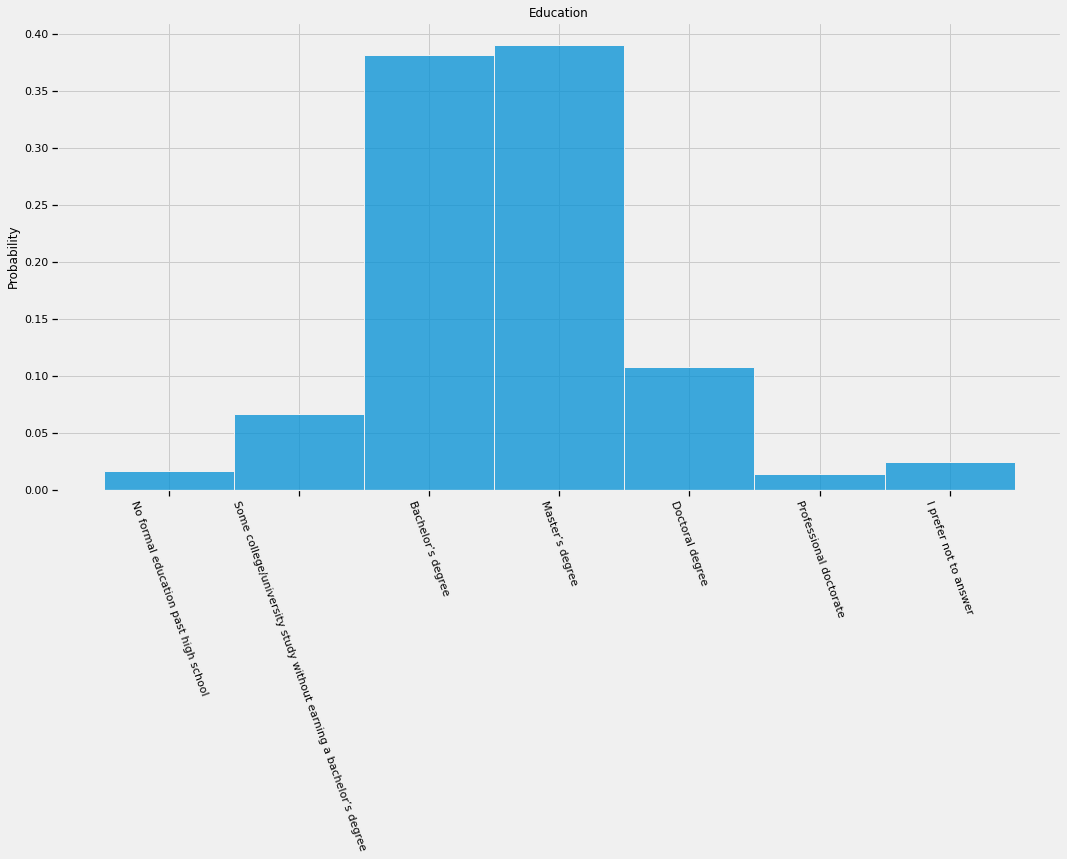

In [55]:
ed_dict = {'No formal education past high school': 0, 'Some college/university study without earning a bachelor’s degree': 0.5,
           'Bachelor’s degree': 2, 'Master’s degree': 3, 'Doctoral degree': 4,
             'Professional doctorate': 15, 'I prefer not to answer': 25}

plt.figure(figsize=(16, 8))
sns.histplot(sorted(raw_survey['Q4'][1:], key=lambda x: ed_dict[x]), stat='probability')
plt.title("Education")
plt.xticks(rotation=-70)
plt.show()

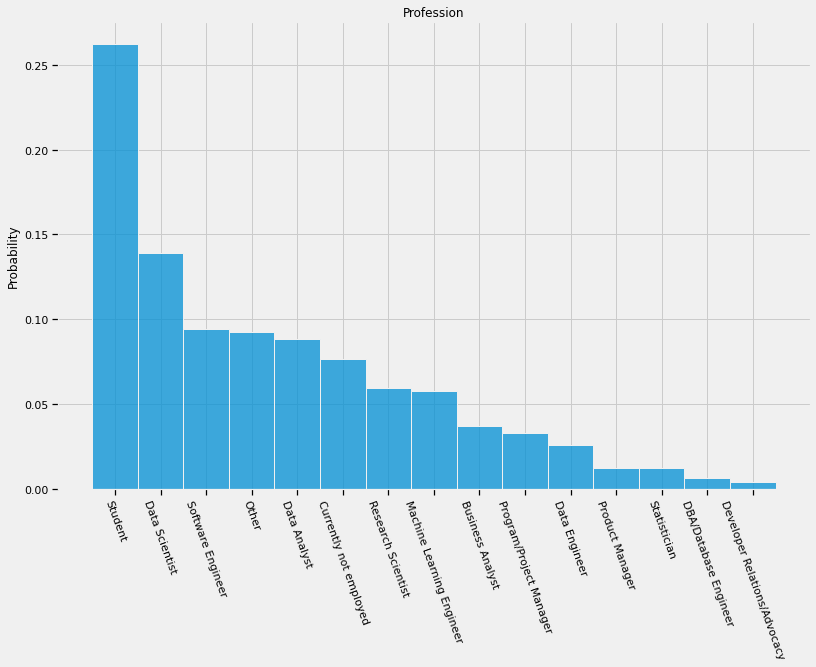

In [58]:
# count the frequency
profession = list(np.unique(raw_survey['Q5'][1:], return_counts=True))
profession[1] = profession[1]/sum(profession[1])
profession = dict(zip(profession[0], profession[1]))
# profession = sorted(profession.items(), key= lambda x: x[1], reverse=True)
# profession = dict(profession)
# profession

plt.figure(figsize=(12, 8))
sns.histplot(sorted(raw_survey['Q5'][1:], key=lambda x: -profession[x]), stat='probability')
plt.title("Profession")
plt.xticks(rotation=-70)
plt.show()

In [59]:
raw_survey['Q6'].unique()

array(['For how many years have you been writing code and/or programming?',
       '5-10 years', '20+ years', '1-3 years', '< 1 years', '3-5 years',
       '10-20 years', 'I have never written code'], dtype=object)

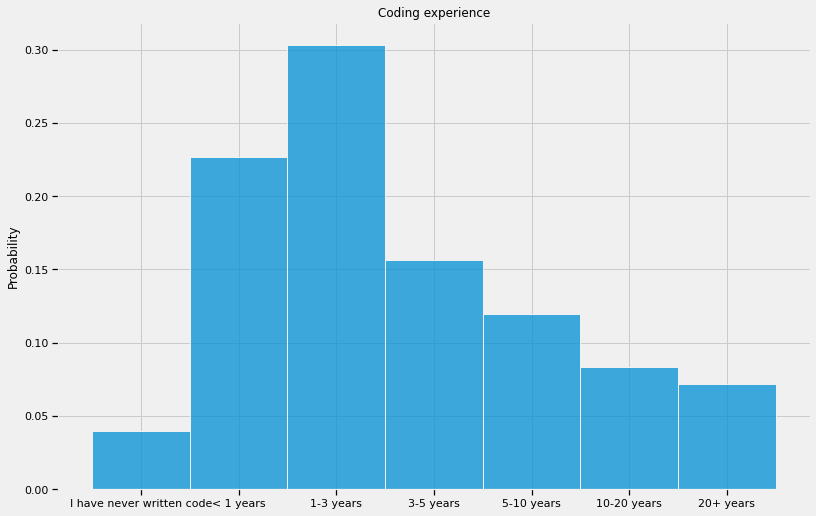

In [60]:
time_dict = {'I have never written code': 0, '< 1 years': 0.5, '1-3 years': 2, '3-5 years': 4, '5-10 years': 7.5,
             '10-20 years': 15, '20+ years': 25}

plt.figure(figsize=(12, 8))
sns.histplot(sorted(raw_survey['Q6'][1:], key=lambda x: time_dict[x]), stat='probability')
plt.title("Coding experience")
plt.show()

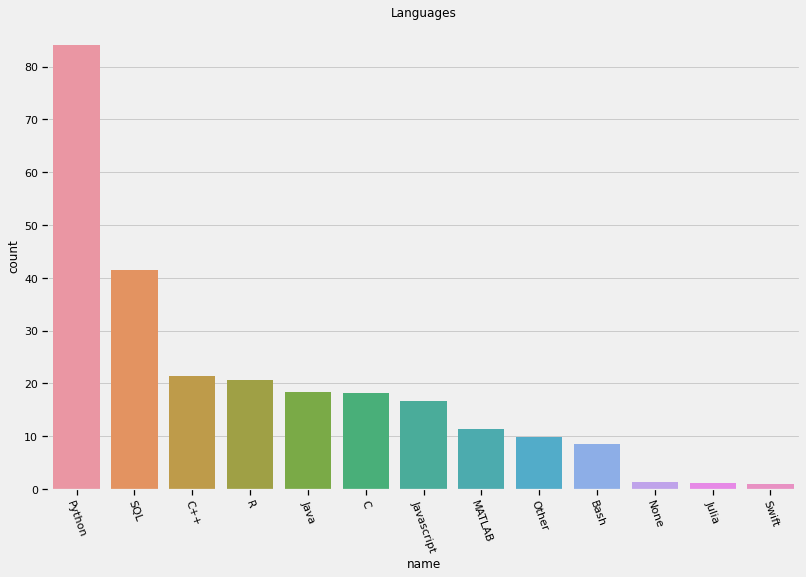

In [15]:
# count the frequency
languages = [1, 1]
languages[0] = [np.count_nonzero(~raw_survey[f'Q7_Part_{x}'][1:].isnull()) for x in range(1, 13)]
languages[0].append(np.count_nonzero(~raw_survey[f'Q7_OTHER'][1:].isnull()))
languages[0] = np.array(languages[0], dtype=float)
languages[0] /= raw_survey.shape[0] /100
languages[1] = ['Python', 'R', 'SQL', 'C', 'C++', 'Java', 'Javascript', 'Julia', 
                                 'Swift', 'Bash', 'MATLAB', 'None', 'Other']
languages = pd.DataFrame({'count': languages[0], 'name': languages[1]})
languages.sort_values('count', ascending=False, inplace=True)

plt.figure(figsize=(12, 8))
sns.barplot(data=languages, y='count', x='name')
plt.title("Languages")
plt.xticks(rotation=-70)
plt.show()

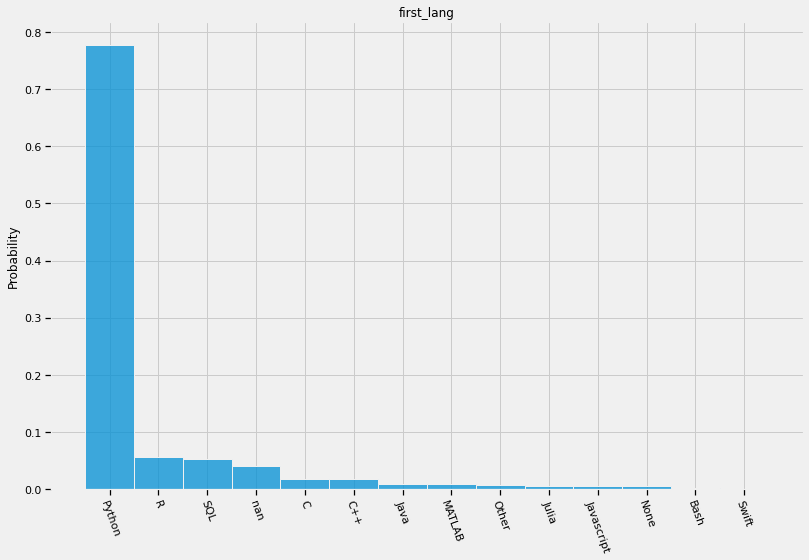

In [6]:
# count the frequency
first_lang = list(np.unique(raw_survey['Q8'][1:].astype('str'), return_counts=True))
first_lang[1] = first_lang[1]/sum(first_lang[1])
first_lang = dict(zip(first_lang[0], first_lang[1]))

plt.figure(figsize=(12, 8))
sns.histplot(sorted(raw_survey['Q8'][1:].astype('str'), key=lambda x: -first_lang[x]), stat='probability')
plt.title("first_lang")
plt.xticks(rotation=-70)
plt.show()

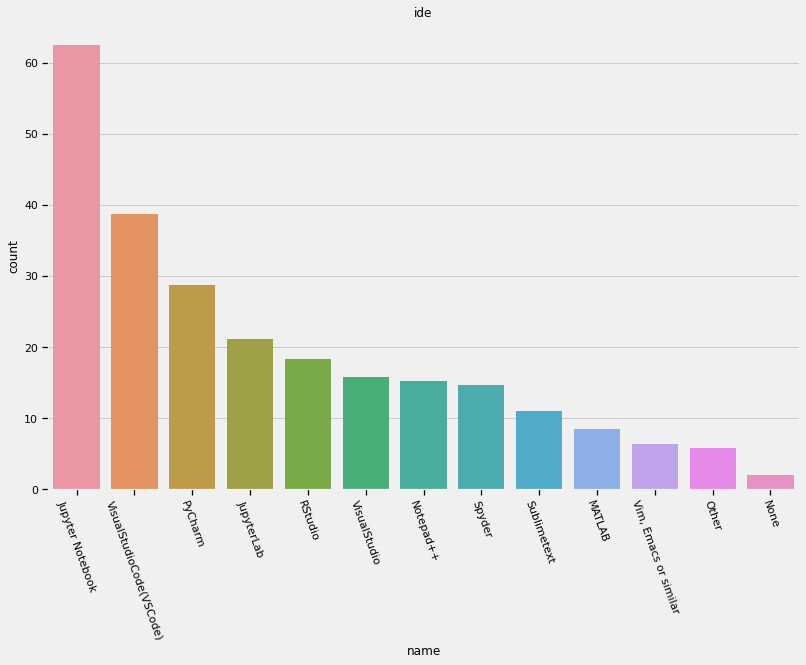

In [14]:
# count the frequency
ide = [1, 1]
ide[0] = [np.count_nonzero(~raw_survey[f'Q9_Part_{x}'][1:].isnull()) for x in range(1, 13)]
ide[0].append(np.count_nonzero(~raw_survey[f'Q9_OTHER'][1:].isnull()))
ide[0] = np.array(ide[0], dtype=float)
ide[0] /= raw_survey.shape[0] /100
ide[1] = ['JupyterLab', 'RStudio', 'VisualStudio', 'VisualStudioCode(VSCode)', 'PyCharm', 'Spyder', 'Notepad++', 'Sublimetext', 
                                 'Vim, Emacs or similar', 'MATLAB', 'Jupyter Notebook', 'None', 'Other']
ide = pd.DataFrame({'count': ide[0], 'name': ide[1]})
ide.sort_values('count', ascending=False, inplace=True)

plt.figure(figsize=(12, 8))
sns.barplot(data=ide, y='count', x='name')
plt.title("ide")
plt.xticks(rotation=-70)
plt.show()

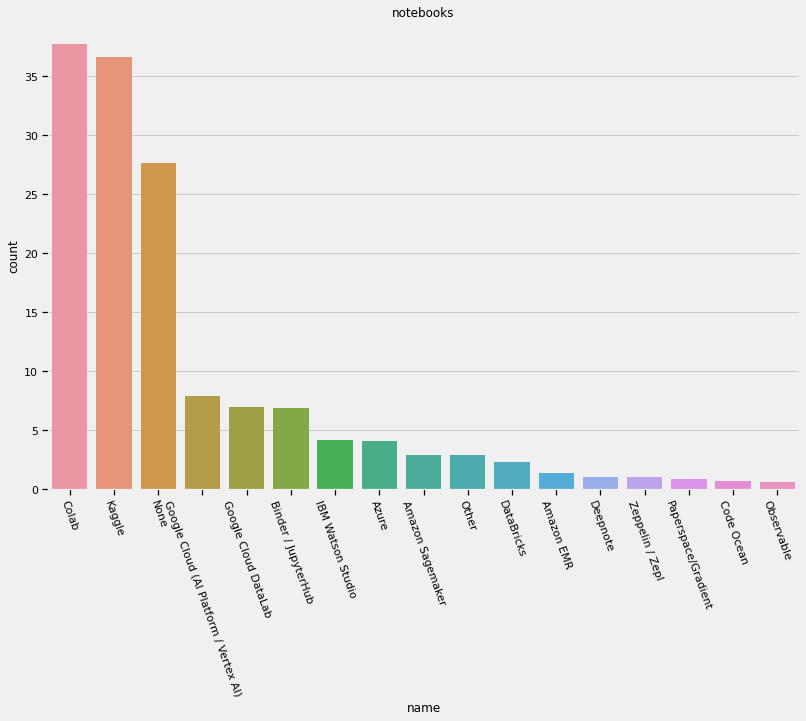

In [16]:
# count the frequency
notebooks = [1, 1]
notebooks[0] = [np.count_nonzero(~raw_survey[f'Q10_Part_{x}'][1:].isnull()) for x in range(1, 17)]
notebooks[0].append(np.count_nonzero(~raw_survey[f'Q10_OTHER'][1:].isnull()))
notebooks[0] = np.array(notebooks[0], dtype=float)
notebooks[0] /= raw_survey.shape[0] /100
notebooks[1] = ['Kaggle', 'Colab', 'Azure', 'Paperspace/Gradient', 'Binder / JupyterHub', 'Code Ocean', 'IBM Watson Studio', 
                'Amazon Sagemaker', 'Amazon EMR', 'Google Cloud (AI Platform / Vertex AI)', 'Google Cloud DataLab', 
                'DataBricks', 'Zeppelin / Zepl', 'Deepnote', 'Observable', 'None', 'Other']
notebooks = pd.DataFrame({'count': notebooks[0], 'name': notebooks[1]})
notebooks.sort_values('count', ascending=False, inplace=True)

plt.figure(figsize=(12, 8))
sns.barplot(data=notebooks, y='count', x='name')
plt.title("notebooks")
plt.xticks(rotation=-70)
plt.show()

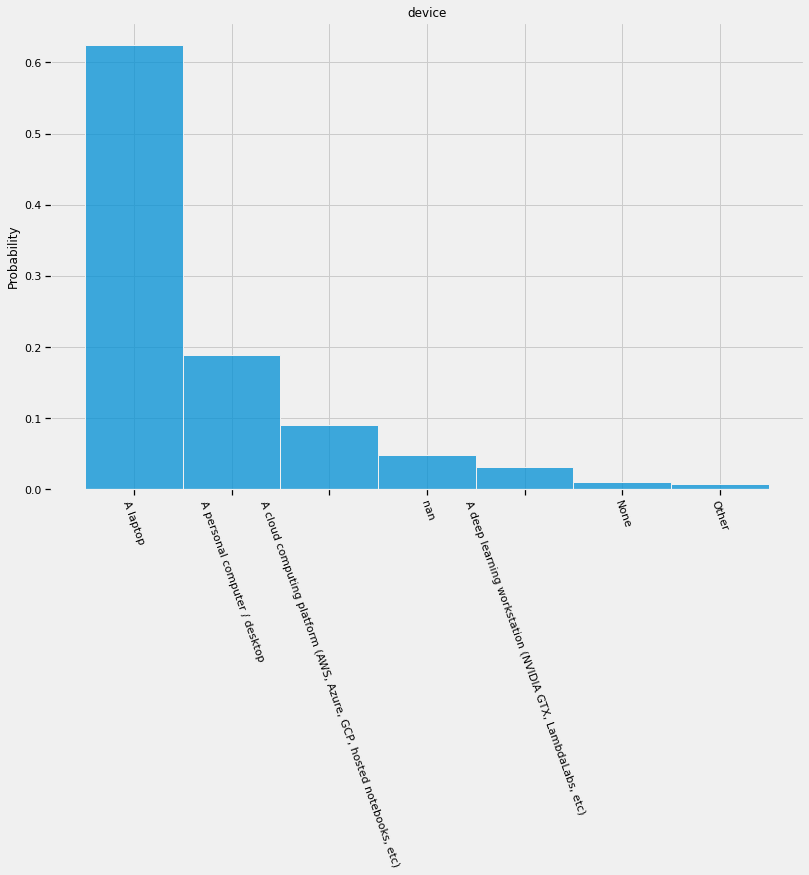

In [17]:
# count the frequency
device = list(np.unique(raw_survey['Q11'][1:].astype('str'), return_counts=True))
device[1] = device[1]/sum(device[1])
device = dict(zip(device[0], device[1]))

plt.figure(figsize=(12, 8))
sns.histplot(sorted(raw_survey['Q11'][1:].astype('str'), key=lambda x: -device[x]), stat='probability')
plt.title("device")
plt.xticks(rotation=-70)
plt.show()

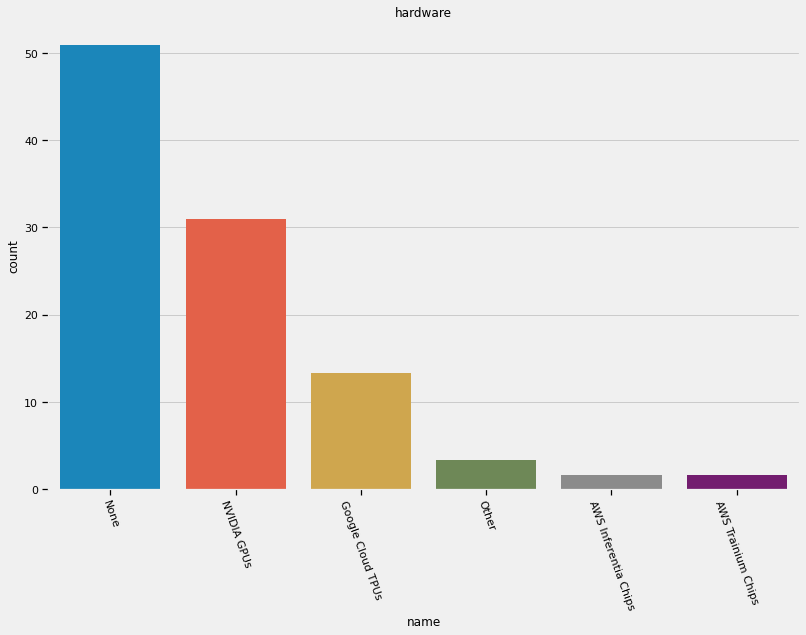

In [18]:
# count the frequency
hardware = [1, 1]
hardware[0] = [np.count_nonzero(~raw_survey[f'Q12_Part_{x}'][1:].isnull()) for x in range(1, 6)]
hardware[0].append(np.count_nonzero(~raw_survey[f'Q12_OTHER'][1:].isnull()))
hardware[0] = np.array(hardware[0], dtype=float)
hardware[0] /= raw_survey.shape[0] /100
hardware[1] = ['NVIDIA GPUs', 'Google Cloud TPUs', 'AWS Trainium Chips', 'AWS Inferentia Chips', 'None', 'Other']
hardware = pd.DataFrame({'count': hardware[0], 'name': hardware[1]})
hardware.sort_values('count', ascending=False, inplace=True)

plt.figure(figsize=(12, 8))
sns.barplot(data=hardware, y='count', x='name')
plt.title("hardware")
plt.xticks(rotation=-70)
plt.show()

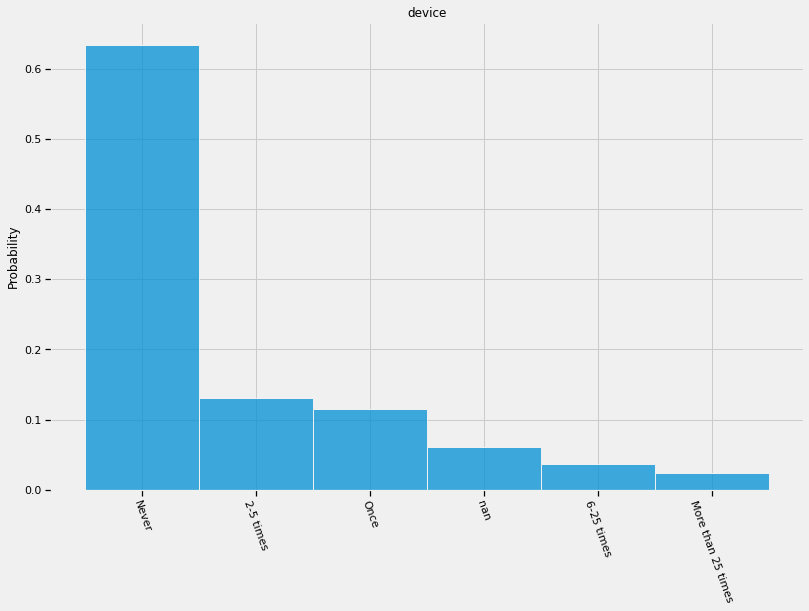

In [19]:
# count the frequency
device = list(np.unique(raw_survey['Q13'][1:].astype('str'), return_counts=True))
device[1] = device[1]/sum(device[1])
device = dict(zip(device[0], device[1]))

plt.figure(figsize=(12, 8))
sns.histplot(sorted(raw_survey['Q13'][1:].astype('str'), key=lambda x: -device[x]), stat='probability')
plt.title("device")
plt.xticks(rotation=-70)
plt.show()

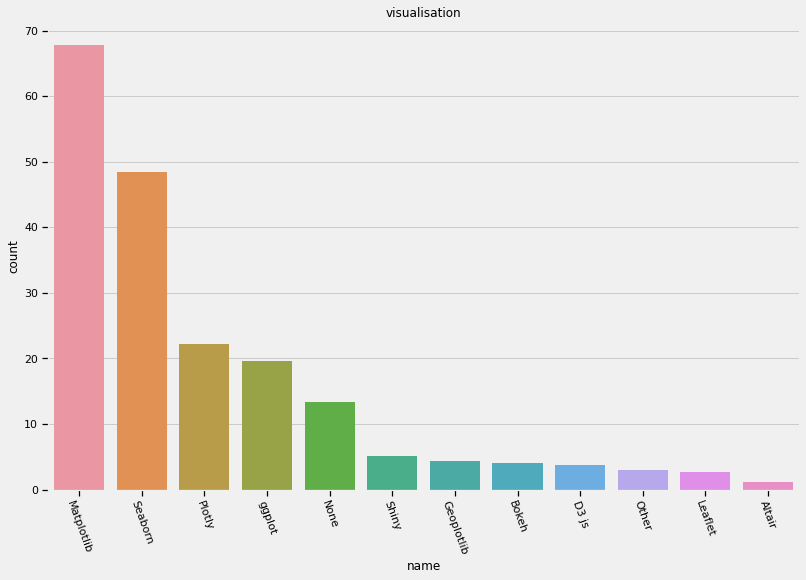

In [21]:
# count the frequency
visualisation = [1, 1]
visualisation[0] = [np.count_nonzero(~raw_survey[f'Q14_Part_{x}'][1:].isnull()) for x in range(1, 12)]
visualisation[0].append(np.count_nonzero(~raw_survey[f'Q14_OTHER'][1:].isnull()))
visualisation[0] = np.array(visualisation[0], dtype=float)
visualisation[0] /= raw_survey.shape[0] /100
visualisation[1] = ['Matplotlib', 'Seaborn', 'Plotly', 'ggplot', 'Shiny', 'D3 js', 'Altair', 'Bokeh', 'Geoplotlib', 
                    'Leaflet', 'None', 'Other']
visualisation = pd.DataFrame({'count': visualisation[0], 'name': visualisation[1]})
visualisation.sort_values('count', ascending=False, inplace=True)

plt.figure(figsize=(12, 8))
sns.barplot(data=visualisation, y='count', x='name')
plt.title("visualisation")
plt.xticks(rotation=-70)
plt.show()

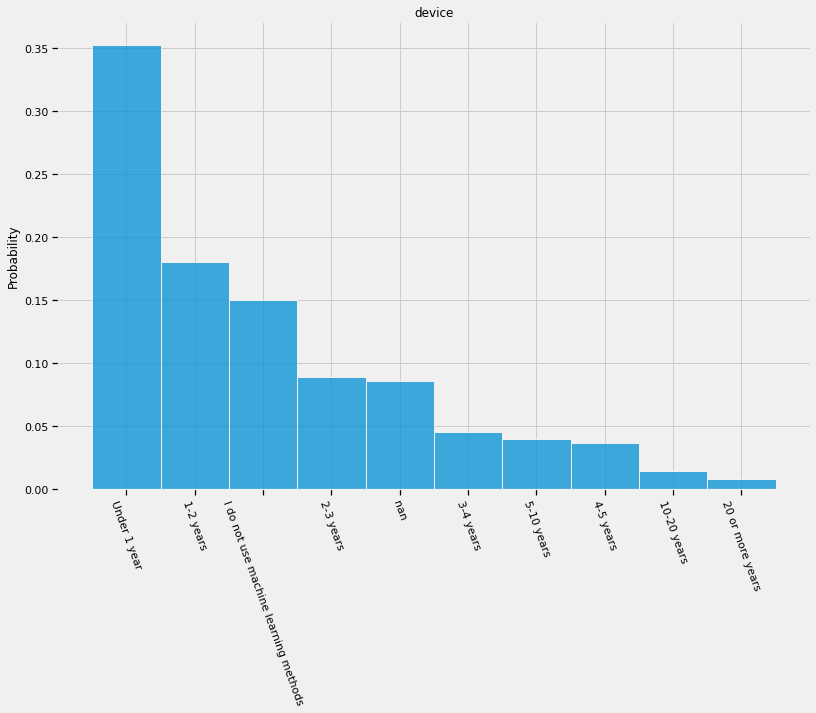

In [22]:
# count the frequency
seniority = list(np.unique(raw_survey['Q15'][1:].astype('str'), return_counts=True))
seniority[1] = seniority[1]/sum(seniority[1])
seniority = dict(zip(seniority[0], seniority[1]))

plt.figure(figsize=(12, 8))
sns.histplot(sorted(raw_survey['Q15'][1:].astype('str'), key=lambda x: -seniority[x]), stat='probability')
plt.title("seniority")
plt.xticks(rotation=-70)
plt.show()

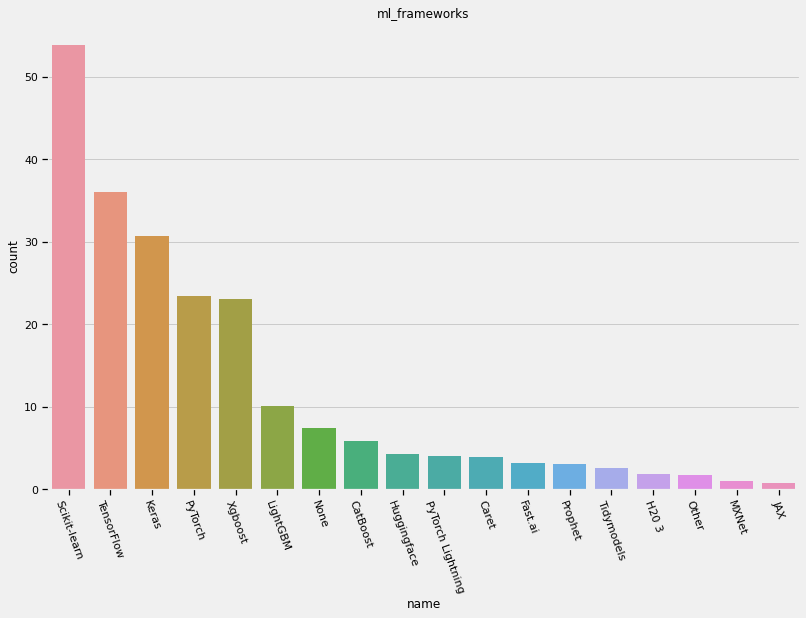

In [23]:
# count the frequency
ml_frameworks = [1, 1]
ml_frameworks[0] = [np.count_nonzero(~raw_survey[f'Q16_Part_{x}'][1:].isnull()) for x in range(1, 18)]
ml_frameworks[0].append(np.count_nonzero(~raw_survey[f'Q16_OTHER'][1:].isnull()))
ml_frameworks[0] = np.array(ml_frameworks[0], dtype=float)
ml_frameworks[0] /= raw_survey.shape[0] /100
ml_frameworks[1] = ['Scikit-learn', 'TensorFlow', 'Keras', 'PyTorch', 'Fast.ai', 'MXNet', 'Xgboost', 'LightGBM', 'CatBoost',
                    'Prophet', 'H20 3', 'Caret', 'Tidymodels', 'JAX', 'PyTorch Lightning', 'Huggingface', 'None', 'Other']
ml_frameworks = pd.DataFrame({'count': ml_frameworks[0], 'name': ml_frameworks[1]})
ml_frameworks.sort_values('count', ascending=False, inplace=True)

plt.figure(figsize=(12, 8))
sns.barplot(data=ml_frameworks, y='count', x='name')
plt.title("ml_frameworks")
plt.xticks(rotation=-70)
plt.show()

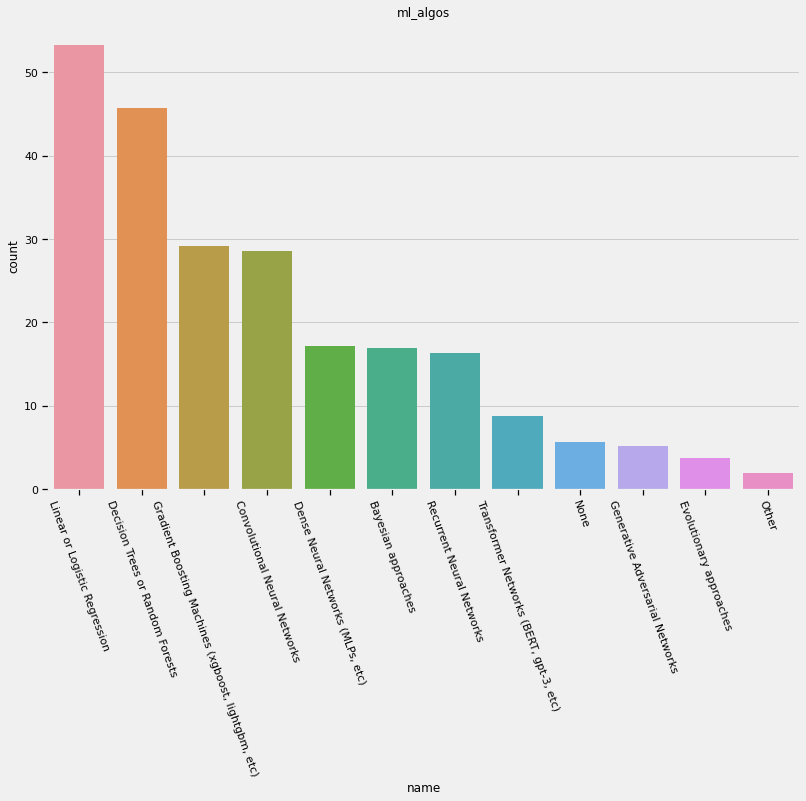

In [24]:
# count the frequency
ml_algos = [1, 1]
ml_algos[0] = [np.count_nonzero(~raw_survey[f'Q17_Part_{x}'][1:].isnull()) for x in range(1, 12)]
ml_algos[0].append(np.count_nonzero(~raw_survey[f'Q17_OTHER'][1:].isnull()))
ml_algos[0] = np.array(ml_algos[0], dtype=float)
ml_algos[0] /= raw_survey.shape[0] /100
ml_algos[1] = ['Linear or Logistic Regression', 'Decision Trees or Random Forests', 
               'Gradient Boosting Machines (xgboost, lightgbm, etc)', 'Bayesian approaches', 'Evolutionary approaches',
               'Dense Neural Networks (MLPs, etc)', 'Convolutional Neural Networks', 'Generative Adversarial Networks',
               'Recurrent Neural Networks', 'Transformer Networks (BERT, gpt-3, etc)', 'None', 'Other']
ml_algos = pd.DataFrame({'count': ml_algos[0], 'name': ml_algos[1]})
ml_algos.sort_values('count', ascending=False, inplace=True)

plt.figure(figsize=(12, 8))
sns.barplot(data=ml_algos, y='count', x='name')
plt.title("ml_algos")
plt.xticks(rotation=-70)
plt.show()

Skip questions 18 and 19 since they only affect the subset. I will come back later to them if needed

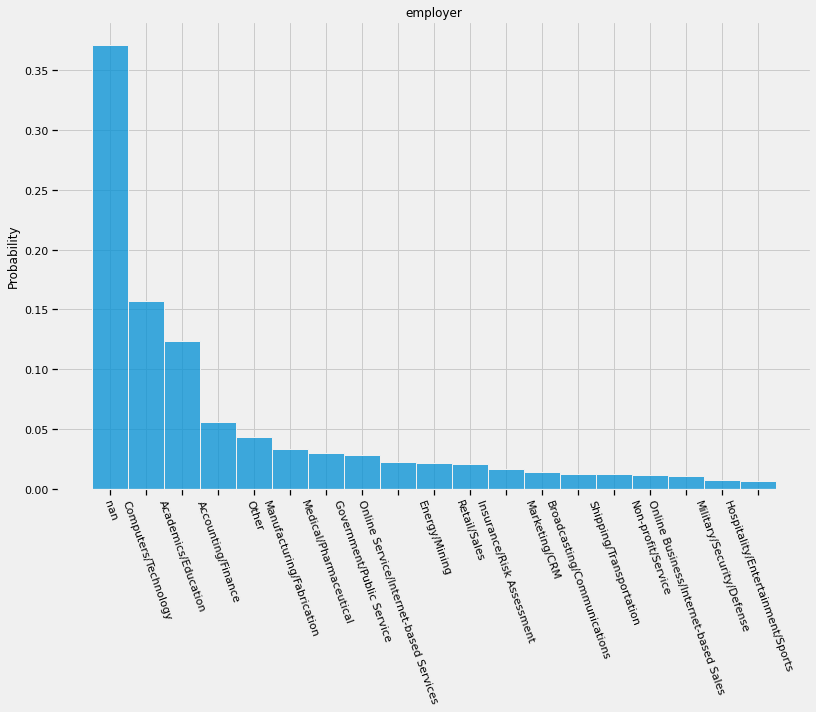

In [25]:
# count the frequency
employer = list(np.unique(raw_survey['Q20'][1:].astype('str'), return_counts=True))
employer[1] = employer[1]/sum(employer[1])
employer = dict(zip(employer[0], employer[1]))

plt.figure(figsize=(12, 8))
sns.histplot(sorted(raw_survey['Q20'][1:].astype('str'), key=lambda x: -employer[x]), stat='probability')
plt.title("employer")
plt.xticks(rotation=-70)
plt.show()

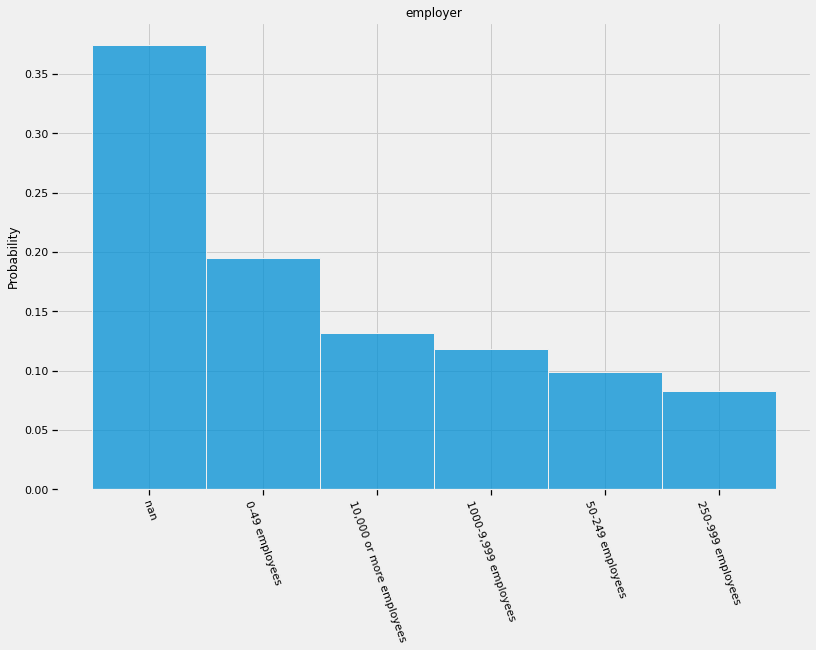

In [26]:
# count the frequency
employer = list(np.unique(raw_survey['Q21'][1:].astype('str'), return_counts=True))
employer[1] = employer[1]/sum(employer[1])
employer = dict(zip(employer[0], employer[1]))

plt.figure(figsize=(12, 8))
sns.histplot(sorted(raw_survey['Q21'][1:].astype('str'), key=lambda x: -employer[x]), stat='probability')
plt.title("employer")
plt.xticks(rotation=-70)
plt.show()

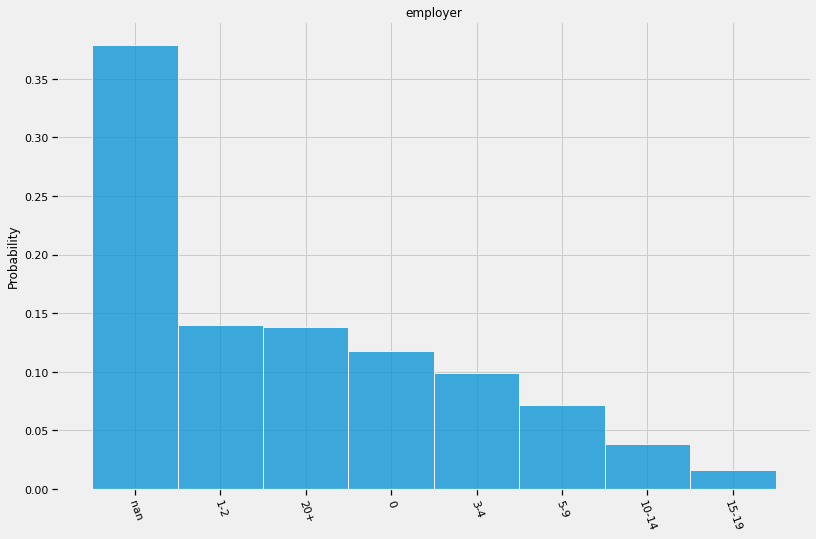

In [27]:
# count the frequency
employer = list(np.unique(raw_survey['Q22'][1:].astype('str'), return_counts=True))
employer[1] = employer[1]/sum(employer[1])
employer = dict(zip(employer[0], employer[1]))

plt.figure(figsize=(12, 8))
sns.histplot(sorted(raw_survey['Q22'][1:].astype('str'), key=lambda x: -employer[x]), stat='probability')
plt.title("employer")
plt.xticks(rotation=-70)
plt.show()

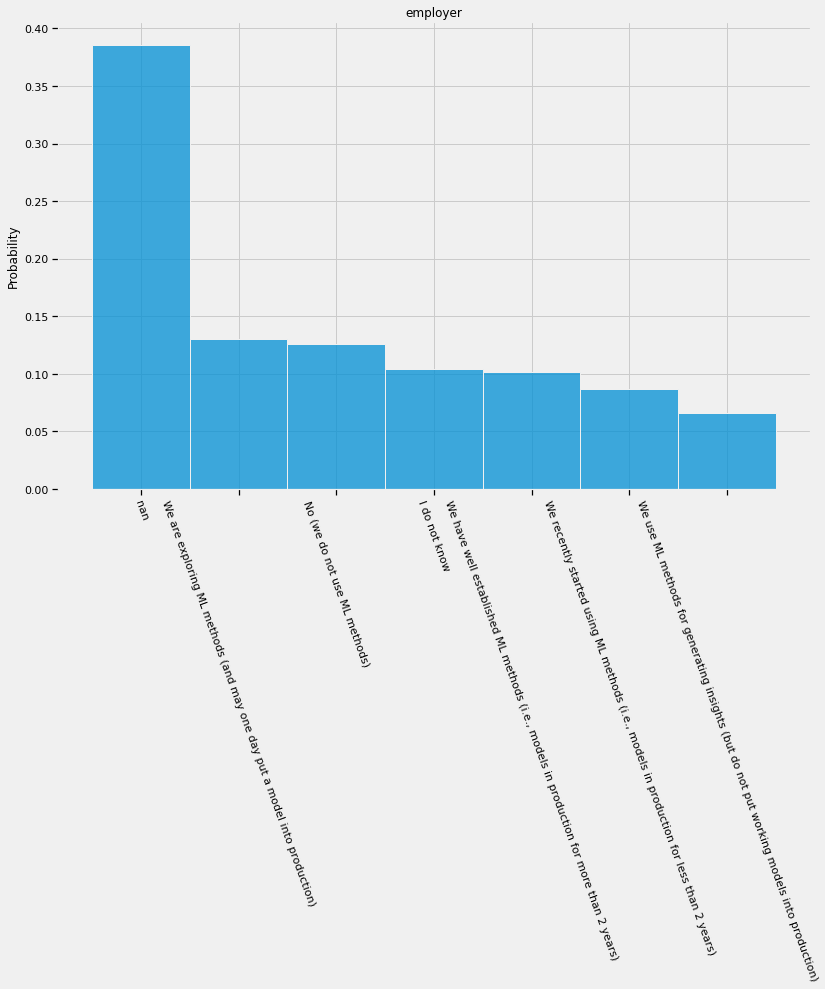

In [28]:
# count the frequency
employer = list(np.unique(raw_survey['Q23'][1:].astype('str'), return_counts=True))
employer[1] = employer[1]/sum(employer[1])
employer = dict(zip(employer[0], employer[1]))

plt.figure(figsize=(12, 8))
sns.histplot(sorted(raw_survey['Q23'][1:].astype('str'), key=lambda x: -employer[x]), stat='probability')
plt.title("employer")
plt.xticks(rotation=-70)
plt.show()

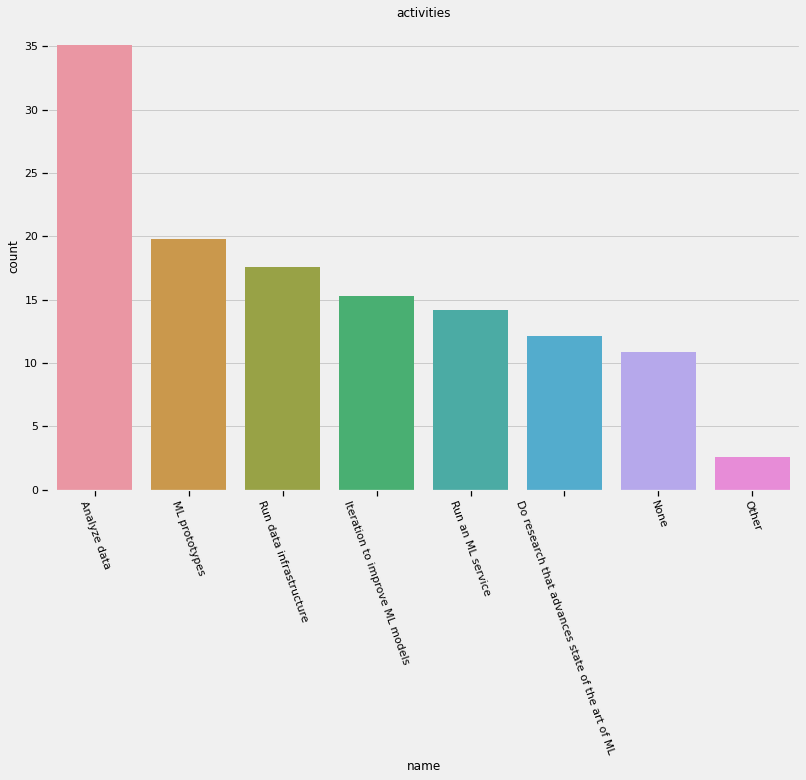

In [30]:
# count the frequency
activities = [1, 1]
activities[0] = [np.count_nonzero(~raw_survey[f'Q24_Part_{x}'][1:].isnull()) for x in range(1, 8)]
activities[0].append(np.count_nonzero(~raw_survey[f'Q24_OTHER'][1:].isnull()))
activities[0] = np.array(activities[0], dtype=float)
activities[0] /= raw_survey.shape[0] /100
activities[1] = ['Analyze data', 'Run data infrastructure', 'ML prototypes', 'Run an ML service', 
                 'Iteration to improve ML models', 'Do research that advances state of the art of ML', 'None', 'Other']
activities = pd.DataFrame({'count': activities[0], 'name': activities[1]})
activities.sort_values('count', ascending=False, inplace=True)

plt.figure(figsize=(12, 8))
sns.barplot(data=activities, y='count', x='name')
plt.title("activities")
plt.xticks(rotation=-70)
plt.show()

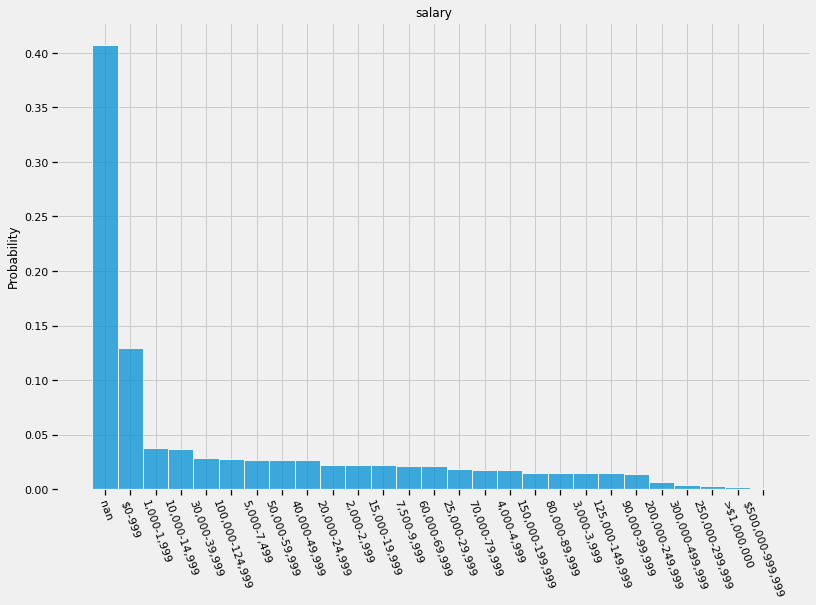

In [34]:
# count the frequency
salary = list(np.unique(raw_survey['Q25'][1:].astype('str'), return_counts=True))
salary[1] = salary[1]/sum(salary[1])
salary = dict(zip(salary[0], salary[1]))

plt.figure(figsize=(12, 8))
sns.histplot(sorted(raw_survey['Q25'][1:].astype('str'), key=lambda x: -salary[x]), stat='probability')
plt.title("salary")
plt.xticks(rotation=-70)
plt.show()

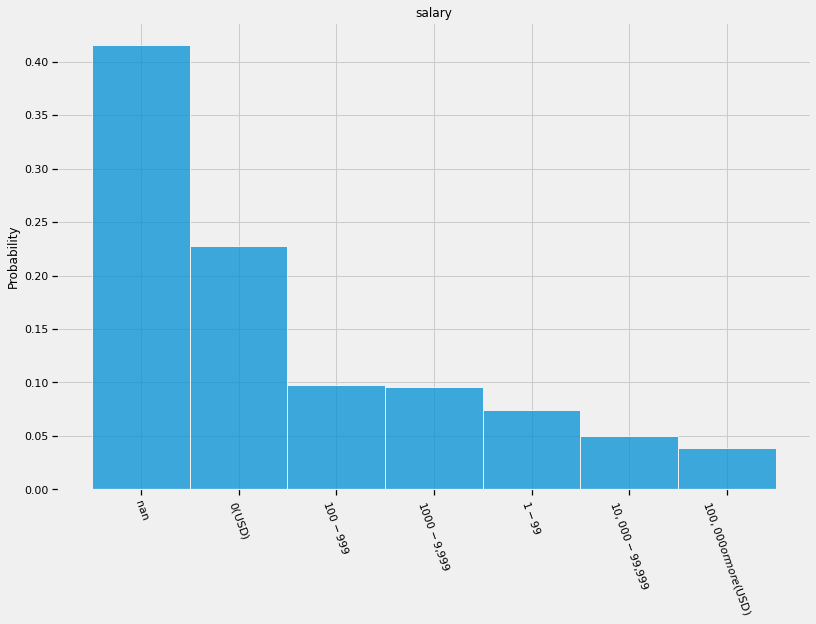

In [35]:
# count the frequency
salary = list(np.unique(raw_survey['Q26'][1:].astype('str'), return_counts=True))
salary[1] = salary[1]/sum(salary[1])
salary = dict(zip(salary[0], salary[1]))

plt.figure(figsize=(12, 8))
sns.histplot(sorted(raw_survey['Q26'][1:].astype('str'), key=lambda x: -salary[x]), stat='probability')
plt.title("salary")
plt.xticks(rotation=-70)
plt.show()

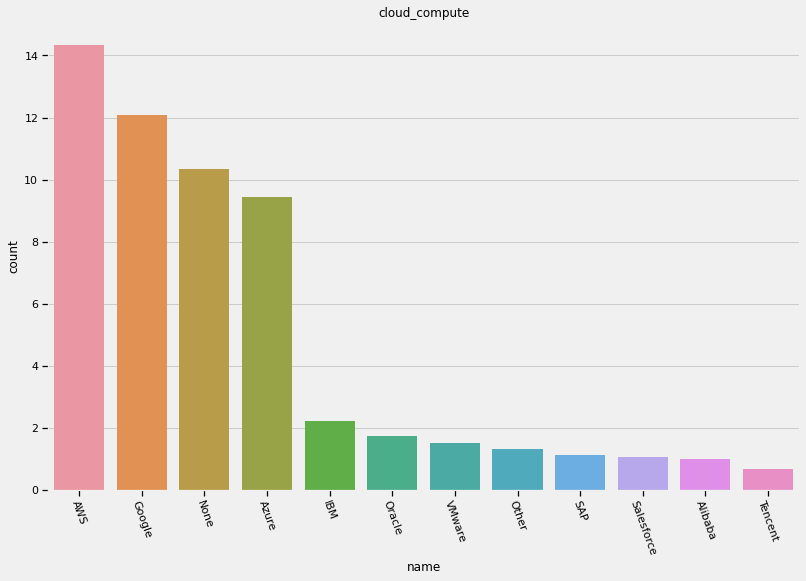

In [36]:
# count the frequency
cloud_compute = [1, 1]
cloud_compute[0] = [np.count_nonzero(~raw_survey[f'Q27_A_Part_{x}'][1:].isnull()) for x in range(1, 12)]
cloud_compute[0].append(np.count_nonzero(~raw_survey[f'Q27_A_OTHER'][1:].isnull()))
cloud_compute[0] = np.array(cloud_compute[0], dtype=float)
cloud_compute[0] /= raw_survey.shape[0] /100
cloud_compute[1] = ['AWS', 'Azure', 'Google', 'IBM', 'Oracle', 'SAP', 'Salesforce', 'VMware', 'Alibaba', 
                    'Tencent', 'None', 'Other']
cloud_compute = pd.DataFrame({'count': cloud_compute[0], 'name': cloud_compute[1]})
cloud_compute.sort_values('count', ascending=False, inplace=True)

plt.figure(figsize=(12, 8))
sns.barplot(data=cloud_compute, y='count', x='name')
plt.title("cloud_compute")
plt.xticks(rotation=-70)
plt.show()

Skip 28, 29, 30 since they're subsets

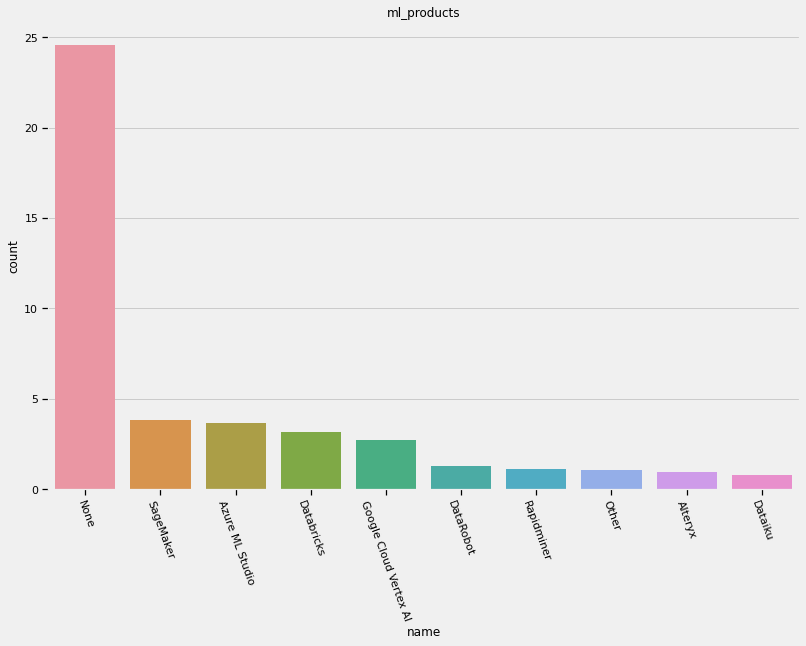

In [37]:
# count the frequency
ml_products = [1, 1]
ml_products[0] = [np.count_nonzero(~raw_survey[f'Q31_A_Part_{x}'][1:].isnull()) for x in range(1, 10)]
ml_products[0].append(np.count_nonzero(~raw_survey[f'Q31_A_OTHER'][1:].isnull()))
ml_products[0] = np.array(ml_products[0], dtype=float)
ml_products[0] /= raw_survey.shape[0] /100
ml_products[1] = ['SageMaker', 'Azure ML Studio', 'Google Cloud Vertex AI', 'DataRobot', 'Databricks', 
                  'Dataiku', 'Alteryx', 'Rapidminer', 'None', 'Other']
ml_products = pd.DataFrame({'count': ml_products[0], 'name': ml_products[1]})
ml_products.sort_values('count', ascending=False, inplace=True)

plt.figure(figsize=(12, 8))
sns.barplot(data=ml_products, y='count', x='name')
plt.title("ml_products")
plt.xticks(rotation=-70)
plt.show()

Skip 32, due to time req, skip 33 since it's a follow-up

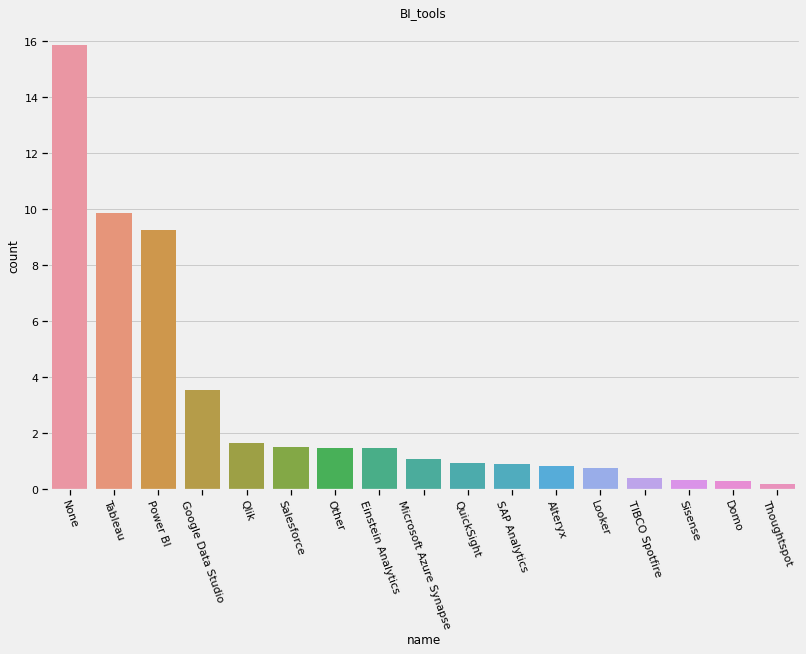

In [38]:
# count the frequency
BI_tools = [1, 1]
BI_tools[0] = [np.count_nonzero(~raw_survey[f'Q34_A_Part_{x}'][1:].isnull()) for x in range(1, 17)]
BI_tools[0].append(np.count_nonzero(~raw_survey[f'Q34_A_OTHER'][1:].isnull()))
BI_tools[0] = np.array(BI_tools[0], dtype=float)
BI_tools[0] /= raw_survey.shape[0] /100
BI_tools[1] = ['QuickSight', 'Power BI', 'Google Data Studio', 'Looker', 'Tableau', 'Salesforce', 
               'Einstein Analytics', 'Qlik', 'Domo', 'TIBCO Spotfire', 'Alteryx', 'Sisense', 'SAP Analytics', 
               'Microsoft Azure Synapse', 'Thoughtspot', 'None', 'Other']
BI_tools = pd.DataFrame({'count': BI_tools[0], 'name': BI_tools[1]})
BI_tools.sort_values('count', ascending=False, inplace=True)

plt.figure(figsize=(12, 8))
sns.barplot(data=BI_tools, y='count', x='name')
plt.title("BI_tools")
plt.xticks(rotation=-70)
plt.show()

Skip 35

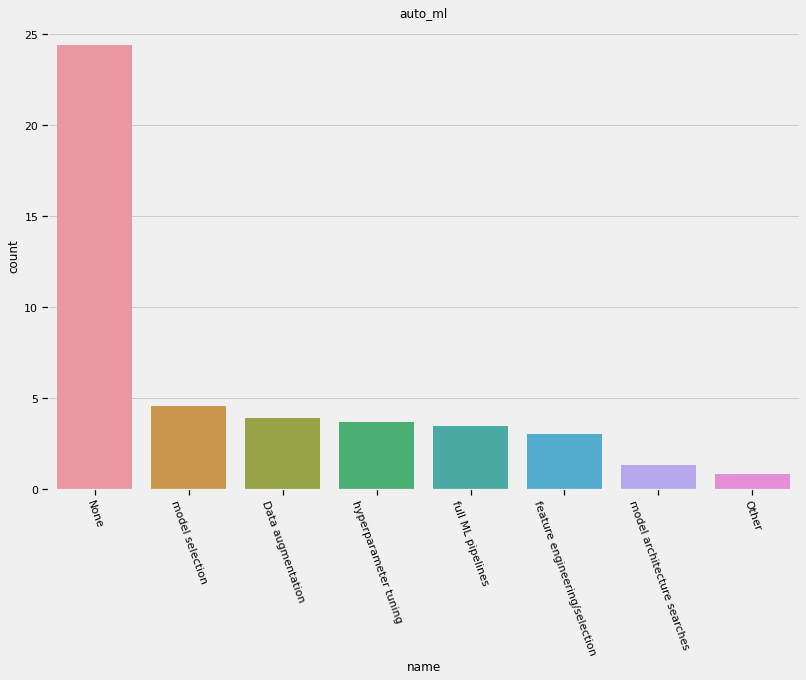

In [39]:
# count the frequency
auto_ml = [1, 1]
auto_ml[0] = [np.count_nonzero(~raw_survey[f'Q36_A_Part_{x}'][1:].isnull()) for x in range(1, 8)]
auto_ml[0].append(np.count_nonzero(~raw_survey[f'Q36_A_OTHER'][1:].isnull()))
auto_ml[0] = np.array(auto_ml[0], dtype=float)
auto_ml[0] /= raw_survey.shape[0] /100
auto_ml[1] = ['Data augmentation', 'feature engineering/selection', 'model selection', 'model architecture searches', 
              'hyperparameter tuning', 'full ML pipelines', 'None', 'Other']
auto_ml = pd.DataFrame({'count': auto_ml[0], 'name': auto_ml[1]})
auto_ml.sort_values('count', ascending=False, inplace=True)

plt.figure(figsize=(12, 8))
sns.barplot(data=auto_ml, y='count', x='name')
plt.title("auto_ml")
plt.xticks(rotation=-70)
plt.show()

Skip 37

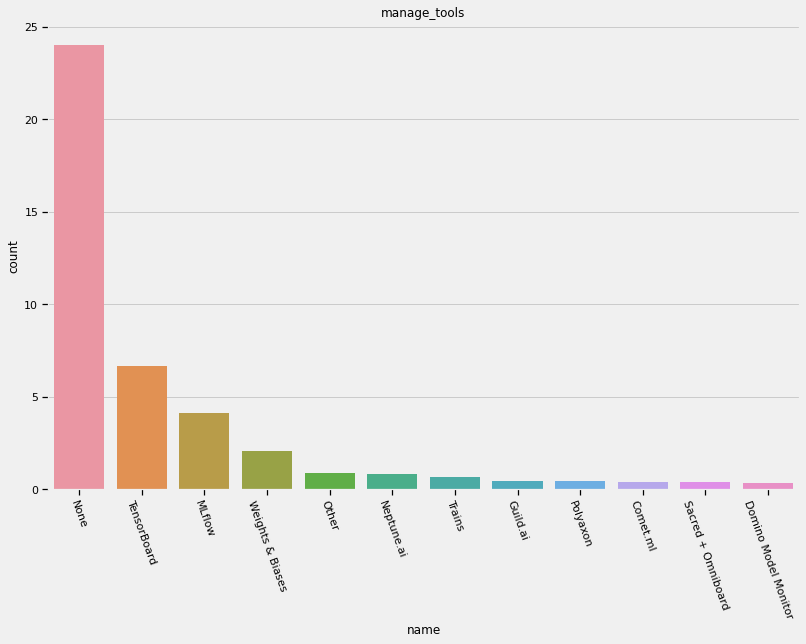

In [40]:
# count the frequency
manage_tools = [1, 1]
manage_tools[0] = [np.count_nonzero(~raw_survey[f'Q38_A_Part_{x}'][1:].isnull()) for x in range(1, 12)]
manage_tools[0].append(np.count_nonzero(~raw_survey[f'Q38_A_OTHER'][1:].isnull()))
manage_tools[0] = np.array(manage_tools[0], dtype=float)
manage_tools[0] /= raw_survey.shape[0] /100
manage_tools[1] = ['Neptune.ai', 'Weights & Biases', 'Comet.ml', 'Sacred + Omniboard', 'TensorBoard', 'Guild.ai',
                   'Polyaxon', 'Trains', 'Domino Model Monitor', 'MLflow', 'None', 'Other']
manage_tools = pd.DataFrame({'count': manage_tools[0], 'name': manage_tools[1]})
manage_tools.sort_values('count', ascending=False, inplace=True)

plt.figure(figsize=(12, 8))
sns.barplot(data=manage_tools, y='count', x='name')
plt.title("manage_tools")
plt.xticks(rotation=-70)
plt.show()

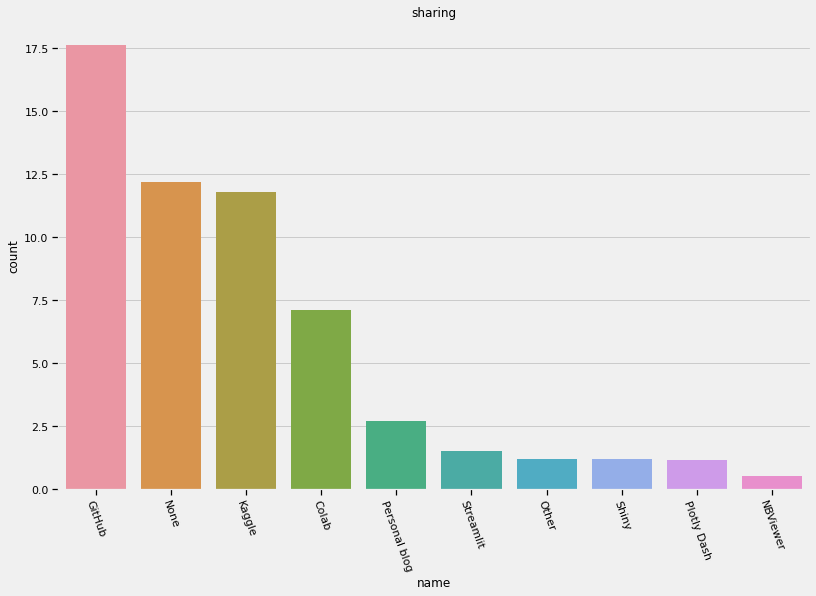

In [41]:
# count the frequency
sharing = [1, 1]
sharing[0] = [np.count_nonzero(~raw_survey[f'Q39_Part_{x}'][1:].isnull()) for x in range(1, 10)]
sharing[0].append(np.count_nonzero(~raw_survey[f'Q39_OTHER'][1:].isnull()))
sharing[0] = np.array(sharing[0], dtype=float)
sharing[0] /= raw_survey.shape[0] /100
sharing[1] = ['Plotly Dash', 'Streamlit', 'NBViewer', 'GitHub', 'Personal blog', 'Kaggle', 'Colab', 'Shiny', 'None', 'Other']
sharing = pd.DataFrame({'count': sharing[0], 'name': sharing[1]})
sharing.sort_values('count', ascending=False, inplace=True)

plt.figure(figsize=(12, 8))
sns.barplot(data=sharing, y='count', x='name')
plt.title("sharing")
plt.xticks(rotation=-70)
plt.show()

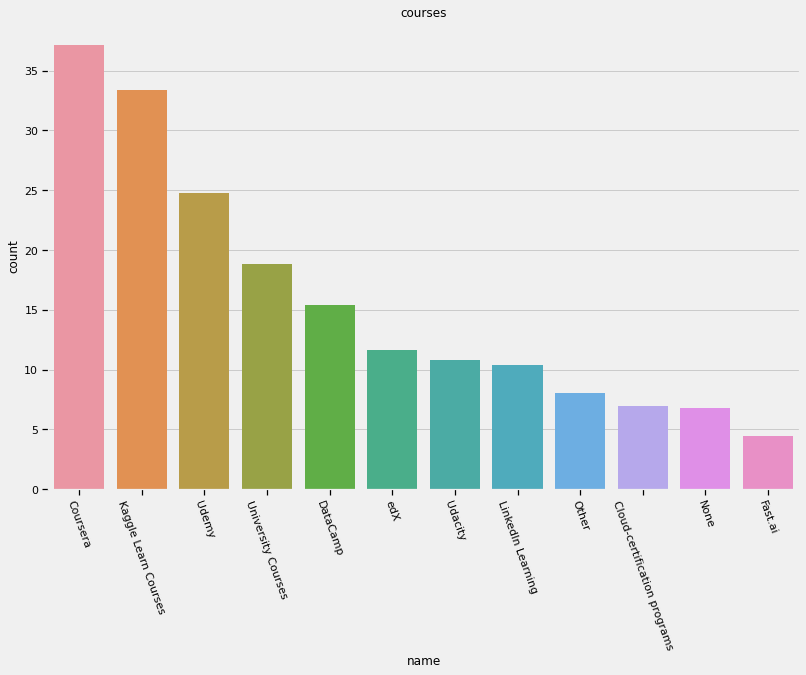

In [42]:
# count the frequency
courses = [1, 1]
courses[0] = [np.count_nonzero(~raw_survey[f'Q40_Part_{x}'][1:].isnull()) for x in range(1, 12)]
courses[0].append(np.count_nonzero(~raw_survey[f'Q40_OTHER'][1:].isnull()))
courses[0] = np.array(courses[0], dtype=float)
courses[0] /= raw_survey.shape[0] /100
courses[1] = ['Coursera', 'edX', 'Kaggle Learn Courses', 'DataCamp', 'Fast.ai', 'Udacity', 'Udemy', 
              'LinkedIn Learning', 'Cloud-certification programs', 'University Courses', 'None', 'Other']
courses = pd.DataFrame({'count': courses[0], 'name': courses[1]})
courses.sort_values('count', ascending=False, inplace=True)

plt.figure(figsize=(12, 8))
sns.barplot(data=courses, y='count', x='name')
plt.title("courses")
plt.xticks(rotation=-70)
plt.show()

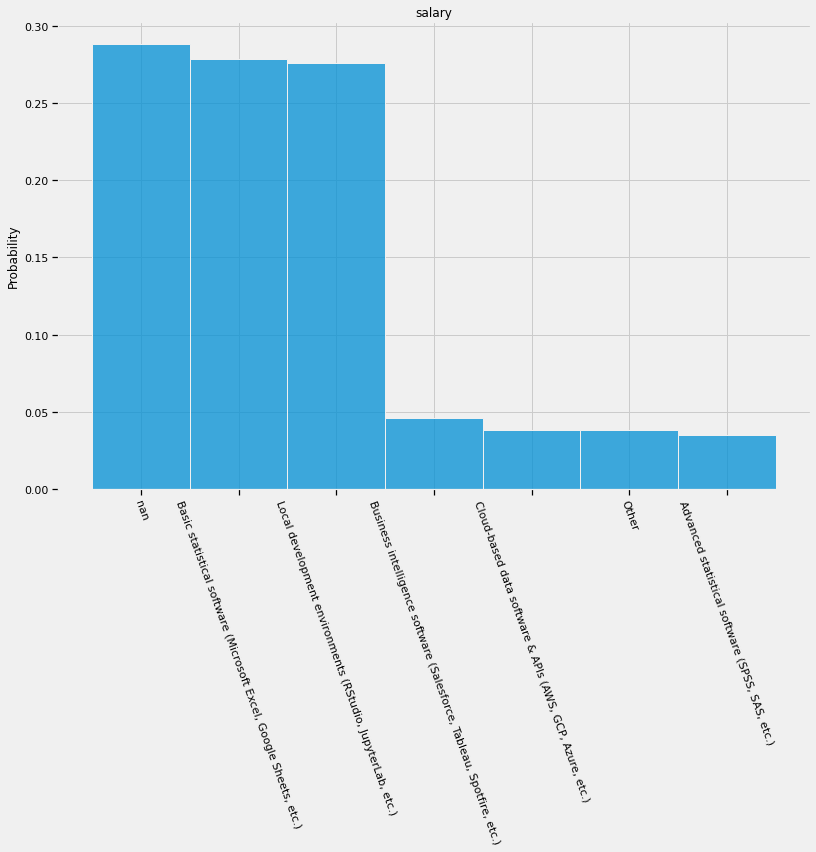

In [43]:
# count the frequency
salary = list(np.unique(raw_survey['Q41'][1:].astype('str'), return_counts=True))
salary[1] = salary[1]/sum(salary[1])
salary = dict(zip(salary[0], salary[1]))

plt.figure(figsize=(12, 8))
sns.histplot(sorted(raw_survey['Q41'][1:].astype('str'), key=lambda x: -salary[x]), stat='probability')
plt.title("salary")
plt.xticks(rotation=-70)
plt.show()

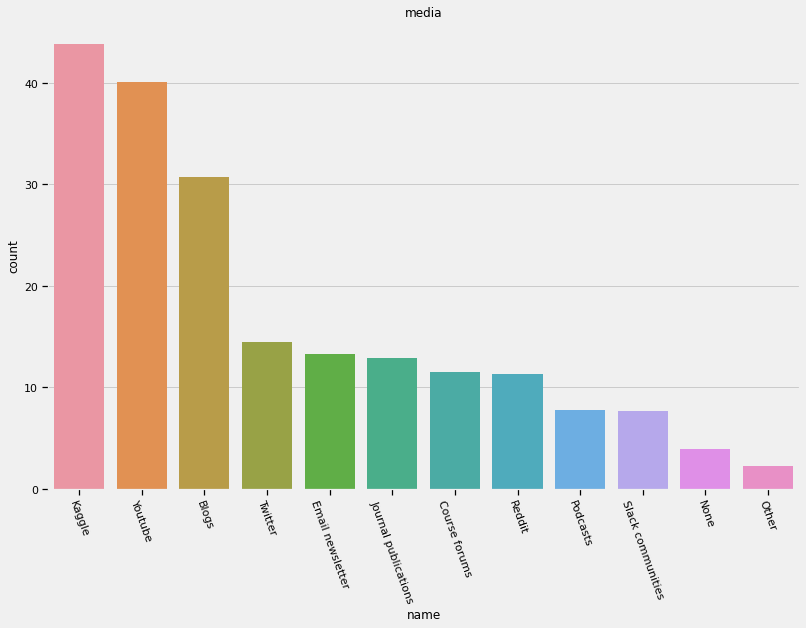

In [44]:
# count the frequency
media = [1, 1]
media[0] = [np.count_nonzero(~raw_survey[f'Q42_Part_{x}'][1:].isnull()) for x in range(1, 12)]
media[0].append(np.count_nonzero(~raw_survey[f'Q42_OTHER'][1:].isnull()))
media[0] = np.array(media[0], dtype=float)
media[0] /= raw_survey.shape[0] /100
media[1] = ['Twitter', 'Email newsletter', 'Reddit', 'Kaggle', 'Course forums', 'Youtube', 'Podcasts', 'Blogs',
            'Journal publications', 'Slack communities', 'None', 'Other']
media = pd.DataFrame({'count': media[0], 'name': media[1]})
media.sort_values('count', ascending=False, inplace=True)

plt.figure(figsize=(12, 8))
sns.barplot(data=media, y='count', x='name')
plt.title("media")
plt.xticks(rotation=-70)
plt.show()

## Results
